
# **Project Overview - SVM**
- Applied SVR (Support Vector Regression) to the "Real-estate-dataset.csv" dataset.
- Process included data preprocessing, model training, and evaluation.
- Achieved moderate prediction accuracy (R-squared: 0.7667).
- Identified potential for improvement through hyperparameter tuning.
- Future steps: explore model complexity and parameter adjustments for optimization.


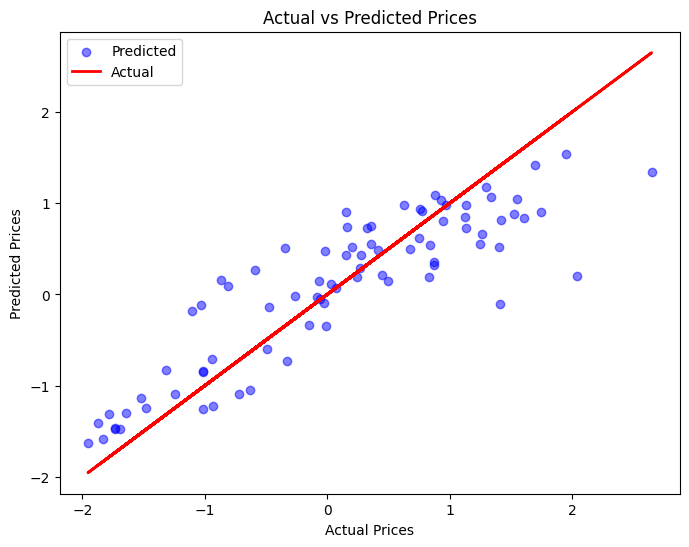

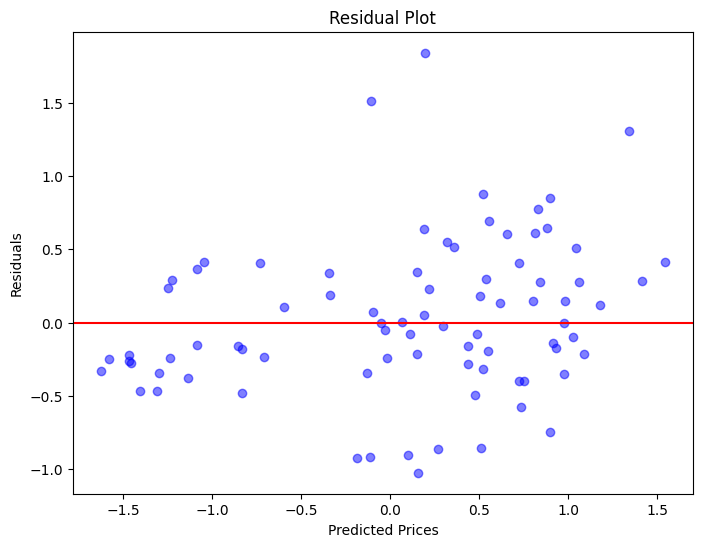

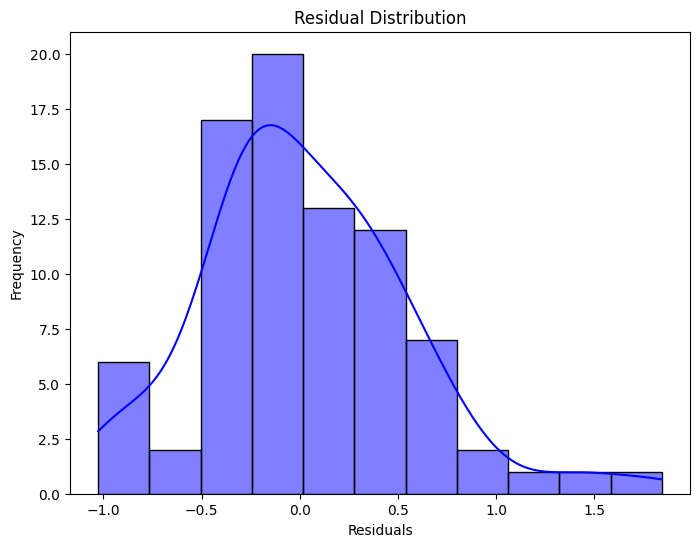

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the data
file_path = '/content/Real-estate-dataset.csv'
df = pd.read_csv(file_path)

# Define a function to clean the data
def clean_data(df):
    # Dropping columns with 'yes'/'no' values
    #df = df.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis=1)

    # Drop 1% of data to make price column normally distributed
    if len(df) > 100:
        df = df.sort_values(['price'], ascending=False).iloc[int(len(df)*0.01):]

    return df

# Clean the dataset
cleaned_df = clean_data(df)

# Function to prepare data with categorical handling and scaling
def prepare_data_with_categorical(df, test_size=0.2, random_state=42):
    #df = pd.get_dummies(df, columns=['furnishingstatus'])
    X = df.drop('price', axis=1)
    y = df['price']

    sc_X = StandardScaler()
    X_scaled = sc_X.fit_transform(X)

    sc_y = StandardScaler()
    y_scaled = np.ravel(sc_y.fit_transform(y.values.reshape(-1, 1)))

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Prepare the data
X_train, X_test, y_train, y_test = prepare_data_with_categorical(cleaned_df)

# Train model function
def train_model(X_train, y_train):
    model = SVR()
    model.fit(X_train, y_train)
    return model

# Evaluate model function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    return y_pred, r_squared, mse, mae, rmse

# Train the model
model = train_model(X_train, y_train)

# Evaluate the model
y_pred, r_squared, mse, mae, rmse = evaluate_model(model, X_test, y_test)

# Plotting functions
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, c='blue', alpha=0.5, label='Predicted')
    plt.plot(y_test, y_test, color='red', linewidth=2, label='Actual')
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs Predicted Prices")
    plt.legend()
    plt.show()

def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, c='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='-')
    plt.title("Residual Plot")
    plt.xlabel("Predicted Prices")
    plt.ylabel("Residuals")
    plt.show()

def plot_residual_distribution(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='blue')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Residual Distribution")
    plt.show()

# Generate plots
plot_predictions(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_residual_distribution(y_test, y_pred)


In [3]:
# Display the evaluation metrics: R-squared, MSE, MAE, RMSE
evaluation_metrics = {
    "R-squared": r_squared,
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "Root Mean Squared Error (RMSE)": rmse
}

evaluation_metrics



{'R-squared': 0.7667433724868334,
 'Mean Squared Error (MSE)': 0.2777084067851516,
 'Mean Absolute Error (MAE)': 0.40470767303640787,
 'Root Mean Squared Error (RMSE)': 0.5269804614832998}

# **Conclusion**
* The SVR model demonstrated very good predictive capability for house prices on real-estate-dataset.
* Hyperparameter tuning offers an avenue for enhancing model accuracy.
* Further exploration of model complexity and parameters is recommended for optimization.